# Prohledávání s cenou (UCS, Dijkstra)

In [1]:
%matplotlib inline
from search import parse_state, is_goal, actions, move
from search import show_plan, visualize_search, log_search_step
import solutions

BFS najde nejkratší plán co do počtu akcí.
Pokud ale přidáme ceny akcí a chceme najít plán s nejnižší cenou
(součtem cen provedených akcí), pak je potřeba algoritmus ještě trochu
vylepšit. Místo klasické fronty použijeme frontu *prioritní*, v níž jsou stavy uspořádané podle ceny nejlevnější nalezené cesty do nich.
Tomuto algoritmu říkáme *prohledávání s cenou* (*Uniform Cost Search*, UCS) a v případě, kdy hledáme nejkratší cestu do všech vrcholů zadaného grafu je známý též jako *Dijkstrův algoritmus*.

In [2]:
# Priklad cen - letet rovne je levnejsi nez letet do boku:
ACTION_COSTS = {'l': 3, 'f': 2, 'r': 3}

## Prioritní fronta

Pokud si budeme ke každému viděnému vrcholu pamatovat cenu nejlevnější cesty do něj, tak lze prioritní frontu jednoduše implementovat jako množinu prvků, ze které odebíráme vždy ten, který má nejlevnější uvedenou cenu:

In [22]:
# Ukladame cenu do vsech videnych stavu (vcetne jiz prozkoumanych).
costs = {'a':0, 'b':3, 'c':3, 'd':5, 'e':6}
fringe = {'c', 'd', 'e'}  # Pouze nektere z nich jsou jeste na okraji.
state = min(fringe, key=lambda s: costs[s])  # Vyber ten nejlevnejsi.
fringe.remove(state)  # Odeber ho z mnoziny.
print('Odebrany stav:', state)
print('Okraj:', fringe)

Odebrany stav: c
Okraj: {'d', 'e'}


In [23]:
# Zarazeni noveho prvku do prioritni fronty:
costs['f'] = 4
fringe.add('f')
print('Okraj:', fringe)

Okraj: {'f', 'd', 'e'}


Prioritní frontu lze implementovat i jinak, například pomocí mazané datové struktury zvané *halda*, a dosáhnout tak lepší časové složitosti některých operací.

## UCS krok za krokem

Podívejme se, jak by v případě uvedených cen vypadal průběh prohledávání:

Explored: Fringe:              Plans:                  Costs:              
0: -      [c1]                 c1:''                   c1:0                
1: c1     [b2, d2]             + b2:l, d2:r            + b2:3, d2:3        
2: b2     [a3, d2]             + a3:ll                 + a3:6              
3: d2     [a3, d3]             + d3:rf                 + d3:5              
4: d3     [a3, d4, e4]         + d4:rff, e4:rfr        + d4:7, e4:8        
5: a3     [d4, b4, e4]         + b4:llr                + b4:9              
6: d4     [d5, b4, e4, e5]     + d5:rfff, e5:rffr      + d5:9, e5:10       
7: e4     [d5, b4, e5]                                                     
8: d5     [b4, e5]                                                         


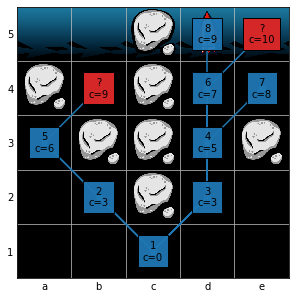

In [3]:
state = parse_state(
'| | |A| | |'
'|A| |A| | |'
'| |A|A| |A|'
'| | |A| | |'
'| | |S| | |')
with visualize_search(state, costs=True, text=True, interactive=False):
    solutions.ucs(state)

## Implementace

<div class="alert alert-block alert-success">
<b>Úkol 7.1: Prohledávání s cenou (UCS, Dijkstra)</b><br/>
Implementujte funkci <i>ucs(initial_state)</i>,
která vrací nejkratší plán pro cestu z <i>initial_state</i> do cílového stavu nalezený pomocí prohledávání s cenou.

<p>
Tipy:
<ul>
<li>
Kromě nejlevnějších plánů do všech viděných stavů ukládejte i
jejich ceny.
</li>
<li>
Z množiny stavů na okraji vybírejte ten s nejnižší cenou plánu.
</li>
<li>
Při expanzi stavu je potřeba zjistit, jaká je cena plánu
do následného stavu při cestě přes prozkoumávaný stav:<br>
`new_cost = costs[state] + ACTION_COSTS[action]`.
</li>
<li>
Pokud se ale do viděného vrcholu umíme dostat i jinou cestou,
musíme zjistit, zda je nová cesta levnější.
Trik pro získání původní ceny nebo nekonečna, pokud jsme
ještě žádnou cestu do stavu neviděli:<br>
`old_cost = costs.get(next_state, inf)`.
</li>
<li>
Nový plán a jeho cenu uložíme pouze v případě,
že je levnější než cena původního plánu.
(A nezapomeneme přidat stav do okraje.)
</li>
<li>
Cílovost stavu je možné kontrolovat až při jeho průzkumu
(nikoliv už při zařazovaní do okraje), jinak bychom
nemuseli vrátit nejlevnější plán.
</li>
</ul>
</p>
</div>

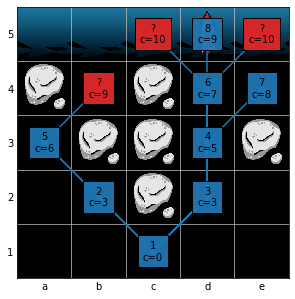

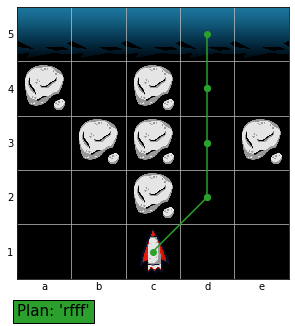

In [4]:
from math import inf

def ucs(initial_state):
    fringe = {initial_state}
    costs = {initial_state: 0}
    plans = {initial_state: ''}
    log_search_step(None, fringe, plans, costs)
    while fringe:
        # Vybirame stav z okraje s nejnizsi cenou:
        state = min(fringe, key=lambda s: costs[s])
        fringe.remove(state)
        # TODO: Implementovat krok UCS.
        log_search_step(state, fringe, plans, costs)

state = parse_state(
'| | | | | |'
'|A| |A| | |'
'| |A|A| |A|'
'| | |A| | |'
'| | |S| | |')
with visualize_search(state, costs=True, interactive=False):
    plan = solutions.ucs(state)  # Vzorove reseni.
    #plan = ucs(state)  # Vase reseni.
show_plan(state, plan)

## Shrnutí

<div class="alert alert-block alert-info">
<ul>
<li>
UCS (Dijkstra) je varianta stromového prohledávání, při kterém z okraje vybíráme stav s nejlevnější cenou, tj. jako okraj používáme prioritní frontu.
</li>
<li>
UCS prochází stavy v pořadí podle cen nejlevnějších cest do nich.
Díky tomu najde zaručeně nejlevnější řešení.
</li>
<li>
Prostorová i časová složitost závisí na nejlevnější cestě do některého cílového stavu a na použité implementaci prioritní fronty.
</li>
</ul>
</div>